# `Title : Dog Vs. Cat Classifier`

# `Library imports`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette(palette='pastel')
import tensorflow as tf
from tensorflow import keras
import warnings
warnings.filterwarnings("ignore")

# `Data Cleaning`

In [2]:
import os
import imghdr

In [3]:
# for root, dirs, files in os.walk('./Data/train'):
#     print(root,dirs,files)

In [4]:
# def img_type_check(data_dir,image_exts = ['jpeg', 'jpg', 'png']):
#     print('Processing Start Sir......')
#     for root, dirs, files in os.walk(data_dir):
#         for file in files:
#             # Construct the path to the current file
#             file_path = os.path.join(root, file)

#             try:
#                 # Check the file type of the current file
#                 file_type = imghdr.what(file_path)

#                 # If the file extension is not in the allowed list, remove it
#                 if file_type not in image_exts:
#                     print(f'Image not in ext list {file_path}')
#                     os.remove(file_path)
#                 else:
#                     # Proceed to process the image if needed, for example, reading it with matplotlib
#                     img = plt.imread(file_path)

#             except Exception as e:
#                 # Print out the issue and the path of the problematic file
#                 print(f'Issue with file {file_path}. Error: {e}')
#                 # Optionally, remove files that cause exceptions
#                 os.remove(file_path)
#     print('Everything is Ready Sir!')

In [5]:
# # Path to the directory containing image classes and possibly other nested subdirectories
# data_dir = './Data/train'

# img_type_check(data_dir)

In [6]:
# # Path to the directory containing image classes and possibly other nested subdirectories
# data_dir = './Data/test'

# img_type_check(data_dir)

# `Data Analysis`

In [7]:
# Define a function to count the number of files (assumed to be images for this context) for each subdirectory in a given directory.
# The function returns a DataFrame with these counts, indexed by a specified set name (e.g., 'train' or 'test').

def count_files_in_subdirs(directory, set_name):
    # Initialize an empty dictionary to hold the count of files for each subdirectory.
    counts = {}

    # Iterate over each item in the given directory.
    for item in os.listdir(directory):
        # Construct the full path to the item.
        item_path = os.path.join(directory, item)

        # Check if the item is a directory.
        if os.path.isdir(item_path):
            # Count the number of files in the subdirectory and add it to the dictionary.
            counts[item] = len(os.listdir(item_path))

    # Convert the counts dictionary to a DataFrame for easy viewing and analysis.
    # The index of the DataFrame is set to the provided set name.
    df = pd.DataFrame(counts, index=[set_name])
    return df

In [8]:
# def count_files_in_subdirs_vis(train_count,test_count):
#     data_count = pd.concat([train_count,test_count])
#     print(data_count)
#     axes = data_count.transpose().plot(kind='bar')
#     plt.bar_label(axes.containers[0])
#     plt.bar_label(axes.containers[1])
#     plt.show()
#     per_data_count = data_count.div(data_count.sum(axis=1),axis=0)*100
#     print(per_data_count)
#     axes = per_data_count.transpose().plot(kind='bar')
#     plt.bar_label(axes.containers[0])
#     plt.bar_label(axes.containers[1])
#     plt.show()

In [9]:
# Paths to the training and testing directories.
train_dir = './Data/train'
test_dir = './Data/test'

In [10]:
# # Count the files in the subdirectories of the training directory and print the result.
# train_count = count_files_in_subdirs(train_dir, 'train')

# # Count the files in the subdirectories of the testing directory and print the result.
# test_count = count_files_in_subdirs(test_dir, 'test')

# count_files_in_subdirs_vis(train_count,test_count)

# `First View to Data`

In [11]:
# pets = os.listdir(train_dir)
# plt.figure(figsize=(15,10))

# for i, pet in enumerate(iterable=pets,start=1):
#     folder = os.path.join(train_dir, pet)
#     img_path = os.path.join(folder, os.listdir(folder)[np.random.randint(0,10000)])
#     img = plt.imread(img_path)
#     plt.subplot(3, 4, i)
#     plt.imshow(img, cmap='grey')
#     plt.title(pet)
#     plt.axis('off')

In [12]:
# import random 
# from tensorflow.keras.preprocessing.image import load_img

# def plot_images_from_directory(directory_path, class_name, num_images=16):
#     # Retrieve list of all file names in the directory
#     image_filenames = os.listdir(directory_path)

#     # If there are fewer images than requested, we'll just show them all
#     if len(image_filenames) < num_images:
#         print(f"Only found {len(image_filenames)} images in {directory_path}, displaying them all.")
#         num_images = len(image_filenames)

#     # Randomly select 'num_images' number of file names
#     selected_images = random.sample(image_filenames, num_images)

#     # Plotting the images
#     fig, axes = plt.subplots(int(np.sqrt(num_images)), int(np.sqrt(num_images)), figsize=(int(np.sqrt(num_images))+2, int(np.sqrt(num_images))+2))  # Adjust the size as needed
#     axes = axes.ravel()

#     for i, image_file in enumerate(selected_images):
#         image_path = os.path.join(directory_path, image_file)
#         # image = Image.open(image_path)
#         image = load_img(image_path)
#         axes[i].imshow(image)
#         axes[i].set_title(f"Image: {class_name}")
#         axes[i].axis('off')  # Hide the axis

#     plt.tight_layout()
#     plt.show()

In [13]:
# pets = os.listdir(train_dir)
# plt.figure(figsize=(15,10))

# for i, pet in enumerate(pets, 1):
#     folder = os.path.join(train_dir, pet)
#     plot_images_from_directory(folder, class_name = pet)

In [14]:
# pets = os.listdir(test_dir)
# plt.figure(figsize=(15,10))

# for i, pet in enumerate(pets, 1):
#     folder = os.path.join(train_dir, pet)
#     plot_images_from_directory(folder, class_name = pet)

# `Know your data`

In [15]:
# # Path to the directory containing image classes and possibly other nested subdirectories
# data_dir = './Data/train'
# img_shapes = []
# # Walk through all directories and files in the dataset
# for root, dirs, files in os.walk(data_dir):
#     for file in files:
#         # Construct the path to the current file
#         file_path = os.path.join(root, file)
#         # Check the shape of the current img
#         img = plt.imread(file_path)

#         # If the image is loaded successfully, print its pixel values
#         if img is not None:
#             # print(img)
#             img_shapes.append(img.shape)
#         else:
#             print("The image could not be loaded. Please check the path and file permissions.")
# unique_values_train = set(img_shapes)
# # print(unique_values_train)

In [16]:
# len(unique_values_train)

In [17]:
# max(unique_values_train),min(unique_values_train)

In [18]:
# # Path to the directory containing image classes and possibly other nested subdirectories
# data_dir = './Data/train'
# # Walk through all directories and files in the dataset
# for root, dirs, files in os.walk(data_dir):
#     for file in files:
#         # Construct the path to the current file
#         file_path = os.path.join(root, file)
#         # Check the shape of the current img
#         img = plt.imread(file_path)

#         # If the image is loaded successfully, print its pixel values
#         if img is not None:
#             # print(img)
#             if img.shape == max(unique_values_train):
#                 print(file_path)
#             elif img.shape == min(unique_values_train):
#                 print(file_path)
#         else:
#             print("The image could not be loaded. Please check the path and file permissions.")

In [19]:
# # Path to the directory containing image classes and possibly other nested subdirectories
# data_dir = './Data/test'
# img_shapes = []
# # Walk through all directories and files in the dataset
# for root, dirs, files in os.walk(data_dir):
#     for file in files:
#         # Construct the path to the current file
#         file_path = os.path.join(root, file)
#         # Check the shape of the current img
#         img = plt.imread(file_path)

#         # If the image is loaded successfully, print its pixel values
#         if img is not None:
#             # print(img)
#             img_shapes.append(img.shape)
#         else:
#             print("The image could not be loaded. Please check the path and file permissions.")
# unique_values_test = set(img_shapes)
# # print(unique_values_test)

`- Here we have different shapes images for training data and testing data. `

In [20]:
# len(unique_values_test)

In [21]:
# max(unique_values_test)

In [22]:
# Clear session to free up memory
from keras import backend as K
K.clear_session()

# `Data Generation For Training`

In [23]:
# import tensorflow as tf

# # Define the parameters
# batch_size = 32
# img_height = 128
# img_width = 128

# # Load the dataset
# train_ds = tf.keras.utils.image_dataset_from_directory(
#     train_dir,
#     validation_split=0.2,
#     label_mode='binary',
#     subset="training",
#     seed=123,
#     image_size=(img_height, img_width),
#     batch_size=batch_size
# )

# val_ds = tf.keras.utils.image_dataset_from_directory(
#     train_dir,
#     validation_split=0.2,
#     label_mode='binary',
#     subset="validation",
#     seed=123,
#     image_size=(img_height, img_width),
#     batch_size=batch_size
# )

# test_ds = tf.keras.utils.image_dataset_from_directory(
#     test_dir,
#     image_size=(img_height,img_width),
#     batch_size=batch_size,
#     label_mode="binary",
# )

# # Normalize the data
# normalization_layer = tf.keras.layers.Rescaling(1./255)

# train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
# val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))
# test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

# Prefetch for performance
# train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
# val_ds = val_ds.cache().prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

# `Model`

In [24]:
# from keras.layers import BatchNormalization,Dropout
# model = tf.keras.Sequential([
#     tf.keras.layers.Conv2D(96, (3, 3), activation='relu', input_shape=(img_height, img_width,3)),
#     tf.keras.layers.MaxPooling2D((2, 2)),
#     tf.keras.layers.Conv2D(96, (3, 3), activation='relu'),
#     tf.keras.layers.MaxPooling2D((2, 2)),
#     tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
#     tf.keras.layers.MaxPooling2D((2, 2)),
#     tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
#     tf.keras.layers.MaxPooling2D((2, 2)),
#     tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
#     tf.keras.layers.MaxPooling2D((2, 2)),
    
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(256, activation='relu'),
#     Dropout(0.2),
#     tf.keras.layers.Dense(128, activation='relu'),
#     Dropout(0.25),
#     BatchNormalization(),
#     tf.keras.layers.Dense(64, activation='relu'),
#     Dropout(0.3),
#     BatchNormalization(),
#     tf.keras.layers.Dense(32, activation='relu'),
#     Dropout(0.25),
#     BatchNormalization(),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])
# model.summary()

# `Model Training `

In [25]:
# stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=7,verbose=1,restore_best_weights=True)
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Train the model
# history = model.fit(train_ds, validation_data=val_ds, epochs=50,callbacks=[stop_early])


# `Training Visulization`

In [26]:
def plot_training_history(history):
    """
    Plots the training and validation accuracy and loss.

    Parameters:
    - history: A Keras History object. Contains the logs from the training process.

    Returns:
    - None. Displays the matplotlib plots for training/validation accuracy and loss.
    """
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(20, 5))

    # Plot training and validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.show()

In [27]:
# plot_training_history(history)

In [28]:
# model.save('./Models/model_3')

# `Model Evaluation`

In [29]:
# model_1 = tf.keras.models.load_model('./Models/model_1')
# model_2 = tf.keras.models.load_model('./Models/model_2')
# model_3 = tf.keras.models.load_model('./Models/model_3')

In [30]:
# train_loss, train_accu = model_1.evaluate(train_ds)
# test_loss, test_accu = model_1.evaluate(test_ds)
# print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_accu*100, test_accu*100))

# train_loss, train_accu = model_2.evaluate(train_ds)
# test_loss, test_accu = model_2.evaluate(test_ds)
# print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_accu*100, test_accu*100))

# train_loss, train_accu = model_3.evaluate(train_ds)
# test_loss, test_accu = model_3.evaluate(test_ds)
# print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_accu*100, test_accu*100))

# `Model Training on Validation Data`

`For Model_2`

In [31]:
# stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=7,verbose=1,restore_best_weights=True)

# history = model_2.fit(val_ds,epochs=30,validation_data=test_ds,callbacks=[stop_early])

In [32]:
# plot_training_history(history)

In [33]:
# train_loss, train_accu = model_2.evaluate(train_ds)
# val_loss, val_accu = model_2.evaluate(val_ds)
# test_loss, test_accu = model_2.evaluate(test_ds)
# print("final train accuracy = {:.2f}% , validation accuracy = {:.2f}% , testing accuracy = {:.2f}%".format(train_accu*100,val_accu*100, test_accu*100))

`For Model_3`

In [34]:
# stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=7,verbose=1,restore_best_weights=True)

# history = model_3.fit(val_ds,epochs=30,validation_data=test_ds,callbacks=[stop_early])

In [35]:
# plot_training_history(history)

In [36]:
# train_loss, train_accu = model_3.evaluate(train_ds)
# val_loss, val_accu = model_3.evaluate(val_ds)
# test_loss, test_accu = model_3.evaluate(test_ds)
# print("final train accuracy = {:.2f}% , validation accuracy = {:.2f}% , testing accuracy = {:.2f}%".format(train_accu*100,val_accu*100, test_accu*100))

In [37]:
# model_2.save('./Models/model_2_updated')
# model_3.save('./Models/model_3_updated')

# `Data Augmentation For Improvement` 

In [61]:
# Define the parameters
batch_size = 32
img_height = 128
img_width = 128

# Load the dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    label_mode='binary',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    label_mode="binary",
    image_size=(img_height,img_width),
    batch_size=batch_size,
)

# Normalize the data
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

augmentation_layers = [
    keras.layers.RandomFlip(
        "horizontal",
        seed=123
    ),
    keras.layers.RandomTranslation(
        height_factor=0.2,
        width_factor=0.2,
        fill_mode="nearest",
        seed=123,
    ),
    keras.layers.RandomRotation(
        factor=0.1,
        fill_mode='nearest',
        seed=123
    ),
    keras.layers.RandomZoom(
        height_factor=0.1,
        width_factor=0.1,
        fill_mode="nearest",
        interpolation="bilinear",
        seed=123,
    )
]


def data_augmentation(x):
    for layer in augmentation_layers:
        x = layer(x)
    return x


train_ds = train_ds.map(lambda x, y: (data_augmentation(x), y))

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [62]:
# for images, labels in train_ds.take(1):
#     plt.figure(figsize=(10, 10))
#     first_image = images[0]
#     for i in range(9):
#         ax = plt.subplot(3, 3, i + 1)
#         augmented_image = data_augmentation(np.expand_dims(first_image, 0))
#         plt.imshow(np.array(augmented_image[0]).astype("int32"))
#         plt.title(int(labels[0]))
#         plt.axis("off")

# `Retrain Model after Augmentation`

In [63]:
# model_2 = tf.keras.models.load_model('./Models/model_2')
# model_3 = tf.keras.models.load_model('./Models/model_3')

`For Model_2`

In [64]:
# stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10,verbose=1,restore_best_weights=True)

# history = model_2.fit(train_ds,epochs=30,validation_data=test_ds,callbacks=[stop_early])

Epoch 1/30
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x00000177580ED5A0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x00000177580ED5A0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. O

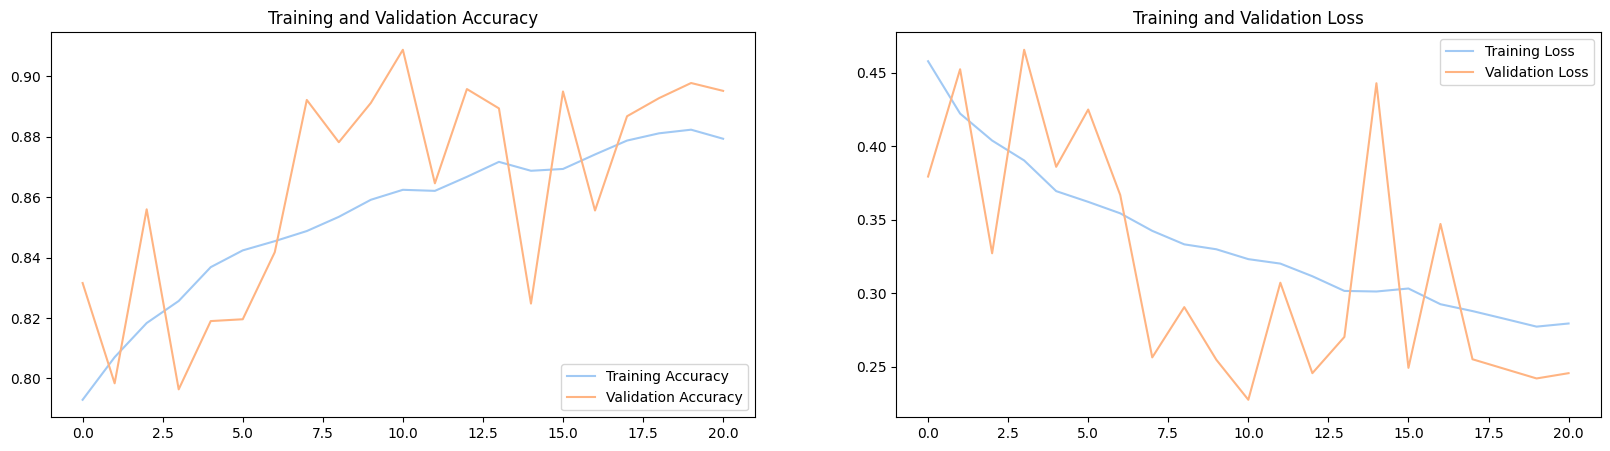

In [65]:
# plot_training_history(history)

In [66]:
# train_loss, train_accu = model_2.evaluate(train_ds)
# test_loss, test_accu = model_2.evaluate(test_ds)
# print("final train accuracy = {:.2f}% , testing accuracy = {:.2f}%".format(train_accu*100, test_accu*100))

157/157 [==============================] - 3s 16ms/step - loss: 0.2274 - accuracy: 0.9088
final train accuracy = 85.43% , testing accuracy = 90.88%


`For Model_3`

In [67]:
# stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10,verbose=1,restore_best_weights=True)

# history = model_3.fit(train_ds,epochs=30,validation_data=test_ds,callbacks=[stop_early])

Epoch 1/30
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x00000177D4E9B490>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x00000177D4E9B490>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. O

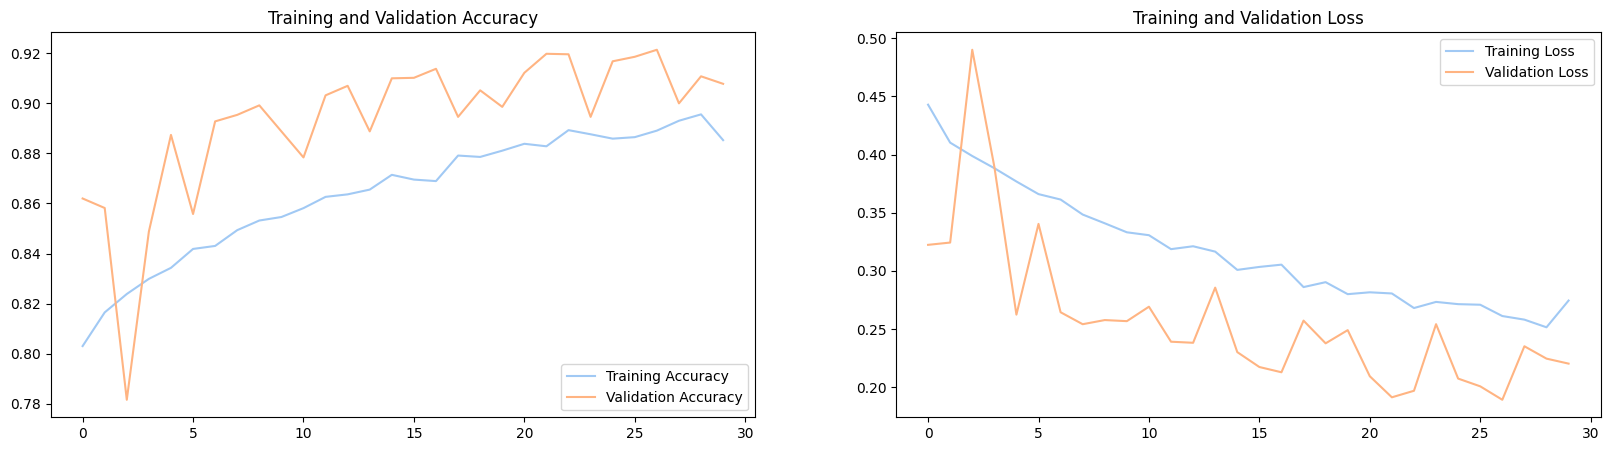

In [68]:
# plot_training_history(history)

In [69]:
# train_loss, train_accu = model_3.evaluate(train_ds)
# test_loss, test_accu = model_3.evaluate(test_ds)
# print("final train accuracy = {:.2f}% , testing accuracy = {:.2f}%".format(train_accu*100, test_accu*100))

157/157 [==============================] - 3s 18ms/step - loss: 0.2203 - accuracy: 0.9078
final train accuracy = 90.69% , testing accuracy = 90.78%


In [70]:
# model_2.save('./Models/model_2_aug')

Cause: Unable to locate the source code of <function trace_model_call.<locals>._wrapped_model at 0x00000177E548BEB0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function trace_model_call.<locals>._wrapped_model at 0x00000177E548BEB0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get 

INFO:tensorflow:Assets written to: ./Models/model_2_aug\assets


INFO:tensorflow:Assets written to: ./Models/model_2_aug\assets


In [71]:
# history = model_3.fit(train_ds,epochs=50,validation_data=test_ds,callbacks=[stop_early],initial_epoch=31)

Epoch 32/50
625/625 [==============================] - 78s 124ms/step - loss: 0.2527 - accuracy: 0.8954 - val_loss: 0.3441 - val_accuracy: 0.8588
Epoch 33/50
625/625 [==============================] - 79s 126ms/step - loss: 0.2511 - accuracy: 0.8968 - val_loss: 0.2726 - val_accuracy: 0.8802
Epoch 34/50
625/625 [==============================] - 248s 396ms/step - loss: 0.2474 - accuracy: 0.8974 - val_loss: 0.2018 - val_accuracy: 0.9168
Epoch 35/50
625/625 [==============================] - 78s 125ms/step - loss: 0.2437 - accuracy: 0.9000 - val_loss: 0.1937 - val_accuracy: 0.9190
Epoch 36/50
625/625 [==============================] - 78s 125ms/step - loss: 0.2432 - accuracy: 0.9007 - val_loss: 0.2432 - val_accuracy: 0.8964
Epoch 37/50
625/625 [==============================] - 258s 413ms/step - loss: 0.2392 - accuracy: 0.9003 - val_loss: 0.1796 - val_accuracy: 0.9260
Epoch 38/50
625/625 [==============================] - 78s 125ms/step - loss: 0.2368 - accuracy: 0.9045 - val_loss: 0.3050

In [72]:
# train_loss, train_accu = model_3.evaluate(train_ds)
# test_loss, test_accu = model_3.evaluate(test_ds)
# print("final train accuracy = {:.2f}% , testing accuracy = {:.2f}%".format(train_accu*100, test_accu*100))

157/157 [==============================] - 3s 18ms/step - loss: 0.1840 - accuracy: 0.9228
final train accuracy = 91.91% , testing accuracy = 92.28%


In [73]:
# model_3.save('./Models/model_3_aug')

Cause: Unable to locate the source code of <function trace_model_call.<locals>._wrapped_model at 0x00000177E548BAC0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function trace_model_call.<locals>._wrapped_model at 0x00000177E548BAC0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function trace_model_call.<locals>._wrapped_model at 0x00000177E548BAC0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


INFO:tensorflow:Assets written to: ./Models/model_3_aug\assets


INFO:tensorflow:Assets written to: ./Models/model_3_aug\assets


# `Giving Image From Outside For Testing`

In [51]:
import tensorflow as tf
from tensorflow import keras

In [3]:
loaded_model = tf.keras.models.load_model('./Models/model_3_aug')

In [4]:
loaded_model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_43 (Conv2D)          (None, 126, 126, 96)      2688      
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 63, 63, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 61, 61, 96)        83040     
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 30, 30, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_45 (Conv2D)          (None, 28, 28, 64)        55360     
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 14, 14, 64)     

In [7]:
import cv2 as cv
import numpy as np

In [47]:
img_path = './Data/train/cats/cat.0.jpg'
img = plt.imread(img_path)

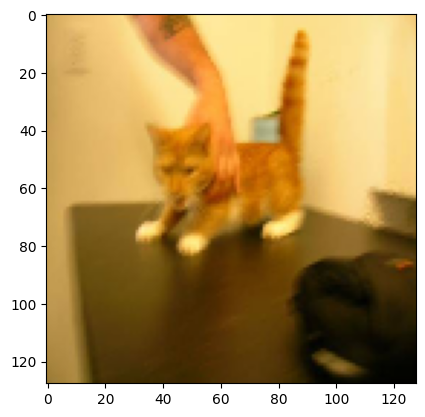

In [48]:
img = cv.resize(img,(128,128))
plt.imshow(img)

In [49]:
Model_Prediction = loaded_model.predict(tf.expand_dims(img, axis=0), verbose=0)[0][0]

In [50]:
Model_Prediction

0.0